In [3]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import pylab as pl 
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler # For standardizing feautures
from sklearn.decomposition import PCA

In [4]:
%matplotlib inline

In [5]:
# Import df_col_sum data
path = r'C:\Users\Zarqa Ayub\Achievement 6'
df=pd.read_csv(os.path.join(path,'02. Data', 'Prepared Data', 'df_col_sum.csv'),index_col=0)

In [6]:
df.head()

,Code,Year,Meningitis,Alzheimer's Dis. & Oth.,Parkinson's Dis.,Nutr. Def.,Malaria,Drown.,Interp. Viol.,Mat. Dis.,...,Preventable Dis.Norm,Sudden Ext. Cause,Sudden Ext. Cause Norm.,Sudden Int. Cause,Sudden Int. Cause Norm.,GDP Corr.Dis.,GDP Corr.Dis.Norm.,Infect. Dis.,Mat.Chl.,Age Related Dis.
0,AFG,2010,2410,1476,465,1974,377,1837,4130,4940,...,313.970903,15514,53.156520,84822,290.630552,23633,80.975122,64395,28761,90972
1,AFG,2011,2327,1508,473,1846,390,1775,4170,4857,...,304.846900,15299,50.797856,85708,284.579555,24152,80.192811,62627,28808,91991
2,AFG,2012,2254,1544,482,1705,94,1716,4245,4736,...,295.683349,15646,50.209593,86785,278.501822,24699,79.261583,61231,28793,93175
3,AFG,2013,2281,1581,491,1690,143,1777,4379,4623,...,289.089520,16258,50.381801,87882,272.336905,25348,78.550737,61312,28857,94405
4,AFG,2014,1935,1620,502,1617,228,1757,4420,4470,...,280.874348,16746,50.181605,89181,267.242667,25965,77.807558,60528,28633,95862


In [7]:
df.columns

Index(['Code', 'Year', 'Meningitis', 'Alzheimer's Dis. & Oth.',
       'Parkinson's Dis.', 'Nutr. Def.', 'Malaria', 'Drown.', 'Interp. Viol.',
       'Mat. Dis.', 'HIV/AIDS', 'Drug Use Dis.', 'Tuberculosis',
       'Cardiovascular Dis.', 'Low. Resp. Inf.', 'Neonatal Dis.',
       'Alcohol Use Dis.', 'Self-harm', 'Exp. to Forces of Nat.',
       'Diarr. Dis.', 'Env. Heat and Cold Exp.', 'Neoplasms',
       'Conf. and Terr.', 'Diabetes Mellitus', 'Chr. Kidney Dis.',
       'Poisonings', 'Prot.-Ener. Malnutr.', 'Road Inj.', 'Chr. Resp. Dis.',
       'Cirr. and Chr. Liver Dis.', 'Digestive Dis.', 'Fire, Heat, Hot Subs.',
       'Acute Hep.', 'GDP per capita', 'Population', 'Total GDP', 'Top Cause',
       'Underlying Factor', 'Continent', 'Preventable Dis.',
       'Preventable Dis.Norm', 'Sudden Ext. Cause', 'Sudden Ext. Cause Norm.',
       'Sudden Int. Cause', 'Sudden Int. Cause Norm.', 'GDP Corr.Dis.',
       'GDP Corr.Dis.Norm.', 'Infect. Dis.', 'Mat.Chl.', 'Age Related Dis.'],
      

### Data Processing

In [8]:
# Create sub containing only numerical data for original causes of death. 
# The columns derivated by summarizing other columns will lead to repeated results those biasing and skewing the data.
df_sub=df[['Meningitis', 'Alzheimer\'s Dis. & Oth.',
       'Parkinson\'s Dis.', 'Nutr. Def.', 'Malaria', 'Drown.', 'Interp. Viol.',
       'Mat. Dis.', 'HIV/AIDS', 'Drug Use Dis.', 'Tuberculosis',
       'Cardiovascular Dis.', 'Low. Resp. Inf.', 'Neonatal Dis.',
       'Alcohol Use Dis.', 'Self-harm', 'Exp. to Forces of Nat.',
       'Diarr. Dis.', 'Env. Heat and Cold Exp.', 'Neoplasms',
       'Conf. and Terr.', 'Diabetes Mellitus', 'Chr. Kidney Dis.',
       'Poisonings', 'Prot.-Ener. Malnutr.', 'Road Inj.', 'Chr. Resp. Dis.',
       'Cirr. and Chr. Liver Dis.', 'Digestive Dis.', 'Fire, Heat, Hot Subs.',
       'Acute Hep.', 'GDP per capita', 'Population', 'Total GDP']]

In [9]:
# GDP and population columns have much higher numbers compared to total deaths from certain causes. 
# Thereby, data need to be standardized first.
# Standardize data using StanfardScaler imported from sklearn.preprocessing module. 
scaler=StandardScaler()
segmentation_std=scaler.fit_transform(df_sub)

In [10]:
segmentation_std

array([[ 0.18931417, -0.2204918 , -0.18979637, ..., -0.65723481,
        -0.05679806, -0.23555679],
       [ 0.17377213, -0.21922572, -0.1884848 , ..., -0.65506049,
        -0.05014876, -0.23435088],
       [ 0.16010264, -0.21780139, -0.18700927, ..., -0.65275674,
        -0.04269992, -0.23299045],
       ...,
       [ 0.01142343, -0.24798937, -0.22947153, ..., -0.61158269,
        -0.16345988, -0.23172783],
       [ 0.0095509 , -0.24743546, -0.22881574, ..., -0.60542359,
        -0.16201663, -0.23032198],
       [ 0.0095509 , -0.24676286, -0.227996  , ..., -0.61540726,
        -0.16054357, -0.23209941]])

### Dimensionality Reduction PCA

Reduce the dimensionality to components that are sufficient for representing the variability in the data.

In [11]:
# Fit the standardized data into pca
pca=PCA()
pca.fit(segmentation_std)

PCA()

In [12]:
# Show the variation per component
pca.explained_variance_ratio_

array([5.95970862e-01, 1.36022569e-01, 4.30160975e-02, 4.10047275e-02,
       3.04307730e-02, 2.93998066e-02, 2.85802328e-02, 2.65859834e-02,
       2.07112655e-02, 1.55728538e-02, 1.23719819e-02, 6.19876155e-03,
       4.70055364e-03, 2.75174293e-03, 1.22407156e-03, 1.12983404e-03,
       7.66260027e-04, 6.41068701e-04, 6.38302025e-04, 5.08874363e-04,
       3.27785032e-04, 2.75523223e-04, 2.58290301e-04, 2.30493543e-04,
       2.00332158e-04, 1.36313881e-04, 1.02734063e-04, 8.38865440e-05,
       5.21302745e-05, 3.86878045e-05, 3.10896045e-05, 1.76443943e-05,
       1.09551253e-05, 7.51164531e-06])

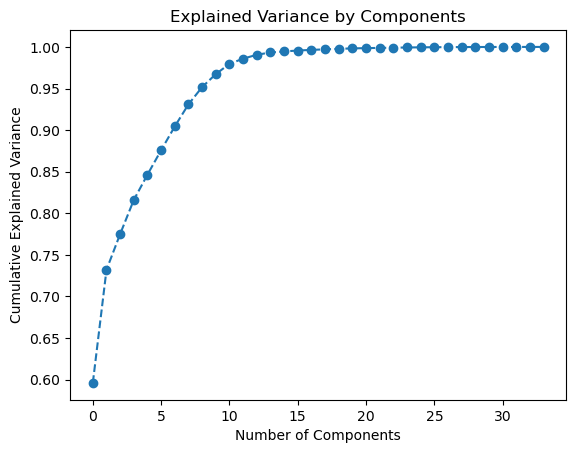

In [14]:
# Plot the results on a chart 
plt.figure()
plt.plot(pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.savefig("C:/Users/Zarqa Ayub/Achievement 6/04. Visualisations/Cumulative variance explained by components.png")

In [15]:
# Fit the data in pca but this time only with two components
pca=PCA(n_components=2)
pca.fit(segmentation_std)

PCA(n_components=2)

In [16]:
scores_pca=pca.transform(segmentation_std)
scores_pca

array([[ 0.14244225, -1.08397489],
       [ 0.12145849, -1.07334836],
       [ 0.11573705, -1.09718362],
       ...,
       [-0.30688239, -0.74702238],
       [-0.32739395, -0.70803804],
       [-0.332033  , -0.69059819]])

In [17]:
# Find the number of clusters by fitting the pca scores
wcss=[]
for i in range (1,21):
    kmeans_pca=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

C:\Users\Zarqa Ayub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Zarqa Ayub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Zarqa Ayub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Zarqa Ayub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1

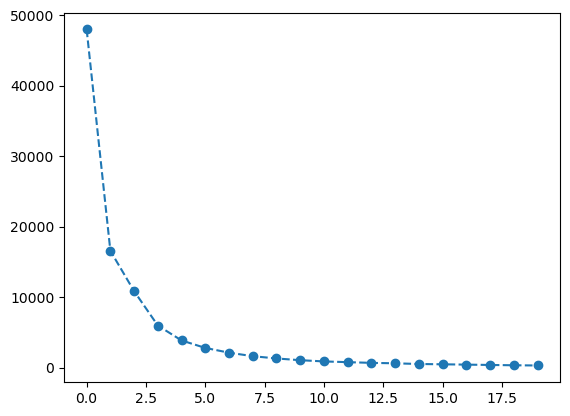

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure()
plt.plot(wcss, marker='o',linestyle='--')
plt.show()
plt.savefig("C:/Users/Zarqa Ayub/Achievement 6/04. Visualisations/Cluster 3.png")

In [19]:
# fit the pca in k-means but this time with n_clusters:3
kmeans_pca=KMeans(n_clusters=3, init='k-means++',random_state=42)

In [20]:
kmeans_pca.fit(scores_pca)

C:\Users\Zarqa Ayub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [21]:
df_kmeans=pd.concat([df_sub.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_kmeans.columns.values[-2:]=['Component 1','Component 2']
df_kmeans['Segment K-means PCA']=kmeans_pca.labels_

In [22]:
df_kmeans['Segment K-means PCA'].value_counts()

Segment K-means PCA
0    1898
2      20
1      10
Name: count, dtype: int64

In [23]:
df_kmeans.head()

,Meningitis,Alzheimer's Dis. & Oth.,Parkinson's Dis.,Nutr. Def.,Malaria,Drown.,Interp. Viol.,Mat. Dis.,HIV/AIDS,Drug Use Dis.,...,Cirr. and Chr. Liver Dis.,Digestive Dis.,"Fire, Heat, Hot Subs.",Acute Hep.,GDP per capita,Population,Total GDP,Component 1,Component 2,Segment K-means PCA
0,2410,1476,465,1974,377,1837,4130,4940,176,281,...,3304,6367,451,2482,543.303042,29185507.0,1.585657e+10,0.142442,-1.083975,0
1,2327,1508,473,1846,390,1775,4170,4857,184,292,...,3318,6370,448,2365,591.162759,30117413.0,1.780429e+10,0.121458,-1.073348,0
2,2254,1544,482,1705,94,1716,4245,4736,191,305,...,3353,6398,445,2264,641.871479,31161376.0,2.000160e+10,0.115737,-1.097184,0
3,2281,1581,491,1690,143,1777,4379,4623,200,316,...,3413,6476,460,2204,637.165523,32269589.0,2.056107e+10,0.123430,-1.094506,0
4,1935,1620,502,1617,228,1757,4420,4470,213,326,...,3454,6522,463,2134,613.856689,33370794.0,2.048489e+10,0.143567,-1.235475,0


In [24]:
df_kmeans['Segment']=df_kmeans['Segment K-means PCA'].map({0:'first',1:'third',2:'second'})

In [25]:
df['Segment']=df_kmeans['Segment']

<Axes: xlabel='Total GDP', ylabel="Parkinson's Dis.">

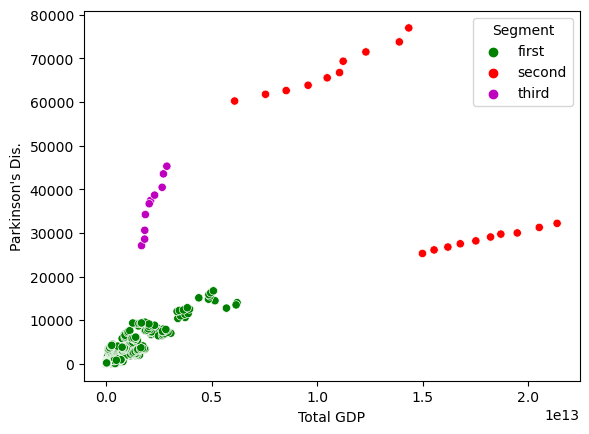

In [26]:
sns.scatterplot(x=df_kmeans['Total GDP'],y=df_kmeans['Parkinson\'s Dis.'],hue=df_kmeans['Segment'], palette=['g','r','m'])

<Axes: xlabel='Total GDP', ylabel="Alzheimer's Dis. & Oth.">

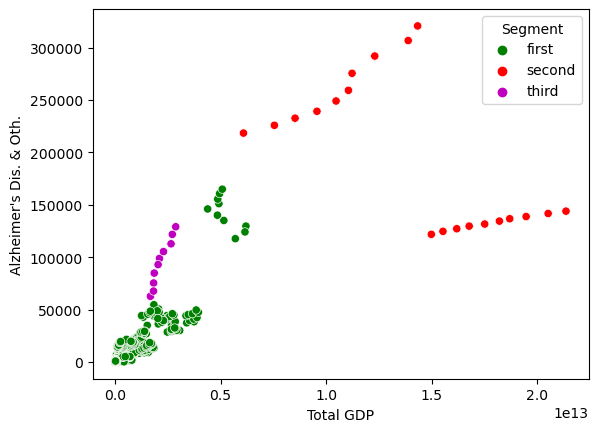

In [27]:
sns.scatterplot(x=df_kmeans['Total GDP'],y=df_kmeans['Alzheimer\'s Dis. & Oth.'],hue=df_kmeans['Segment'], palette=['g','r','m'])

<Axes: xlabel='Total GDP', ylabel='Digestive Dis.'>

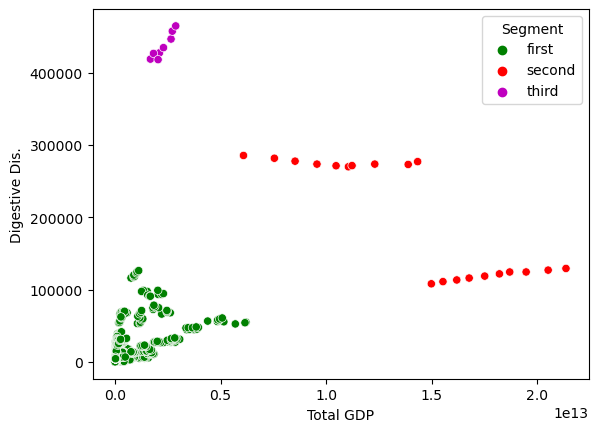

In [29]:
sns.scatterplot(x=df_kmeans['Total GDP'],y=df_kmeans['Digestive Dis.'],hue=df_kmeans['Segment'], palette=['g','r','m'])

<Axes: xlabel='Total GDP', ylabel='Drug Use Dis.'>

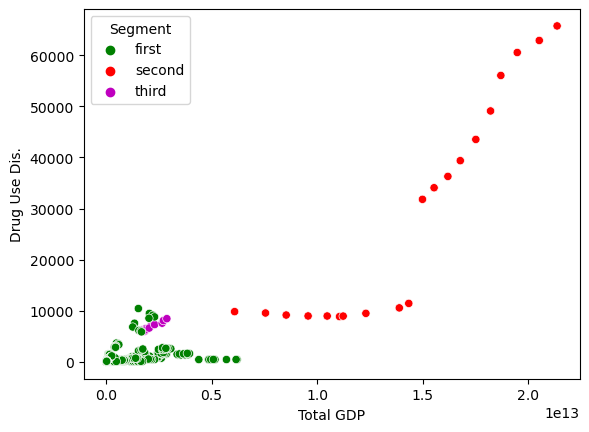

In [30]:
sns.scatterplot(x=df_kmeans['Total GDP'],y=df_kmeans['Drug Use Dis.'],hue=df_kmeans['Segment'], palette=['g','r','m'])

<Axes: xlabel='Total GDP', ylabel='Fire, Heat, Hot Subs.'>

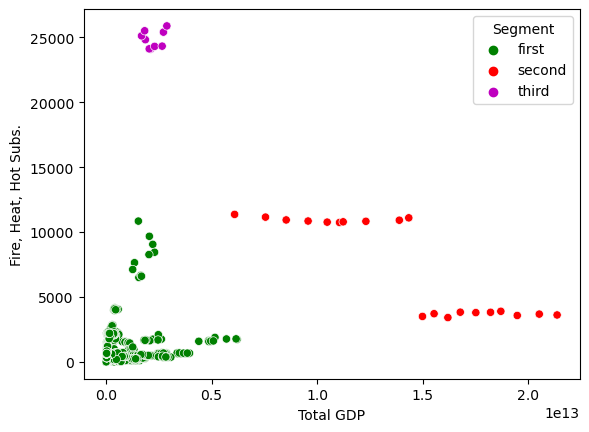

In [34]:
sns.scatterplot(x=df_kmeans['Total GDP'],y=df_kmeans['Fire, Heat, Hot Subs.'],hue=df_kmeans['Segment'], palette=['g','r','m'])

<Axes: xlabel='Total GDP', ylabel='HIV/AIDS'>

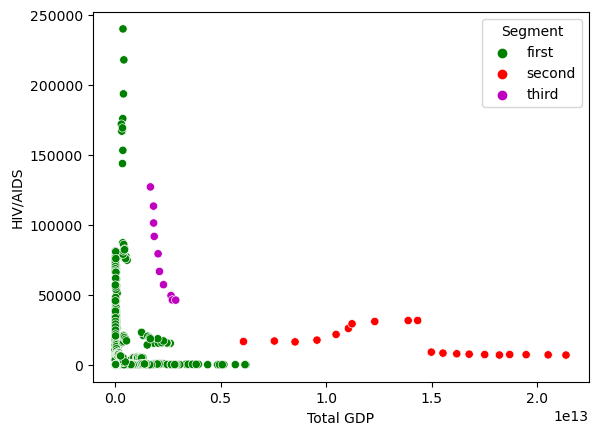

In [35]:
sns.scatterplot(x=df_kmeans['Total GDP'],y=df_kmeans['HIV/AIDS'],hue=df_kmeans['Segment'], palette=['g','r','m'])

### Conclusion

After multiple attempts and adjustments to the number of clusters and components, I have concluded that utilizing 2 components and 3 clusters provides the most fitting categorization for the data. The green group exhibits the highest variability concerning GDP, the red group shows that the dependent variables are mostly not influenced by the independent variable, and the violet group indicates increases even when there are no significant changes in the independent variable. In conclusion, there is a correlation between total GDP of a country and in the causes of mortality. Although there isn't any linear or direct relationship, The GDP cannot be dismissed as an independent factor influencing causes of deaths.

In [36]:
# Export cluster data
df.to_csv(os.path.join(path,'02. data','Prepared data','df_cluster.csv'))